In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime as dt

In [2]:
%matplotlib notebook

In [3]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [4]:
confirmed_df = pd.read_csv(confirmed_url)
confirmed_df = confirmed_df.drop(columns=['Lat','Long']).groupby('Country/Region').agg(np.sum)
confirmed_df.columns = pd.to_datetime(confirmed_df.columns)

In [5]:
confirmed_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
Albania,0,0,0,0,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
Algeria,0,0,0,0,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
Andorra,0,0,0,0,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
Angola,0,0,0,0,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8


In [6]:
size = int(np.ceil((pd.Timestamp.now() - pd.to_datetime('2020-01-22'))/dt.timedelta(weeks=1)))
bins = [pd.to_datetime('2020-01-22') + dt.timedelta(weeks=i) for i in range(size)]
bins

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-19 00:00:00'),
 Timestamp('2020-02-26 00:00:00'),
 Timestamp('2020-03-04 00:00:00'),
 Timestamp('2020-03-11 00:00:00'),
 Timestamp('2020-03-18 00:00:00'),
 Timestamp('2020-03-25 00:00:00'),
 Timestamp('2020-04-01 00:00:00')]

<IPython.core.display.Javascript object>


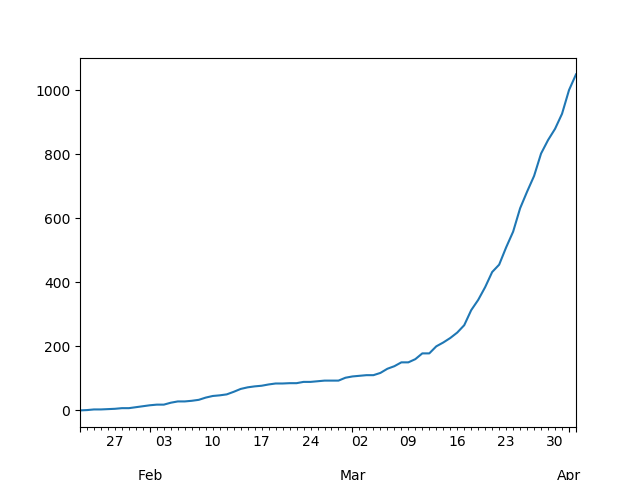

In [7]:
Singapore = confirmed_df.loc['Singapore']
Singapore.plot()

<IPython.core.display.Javascript object>


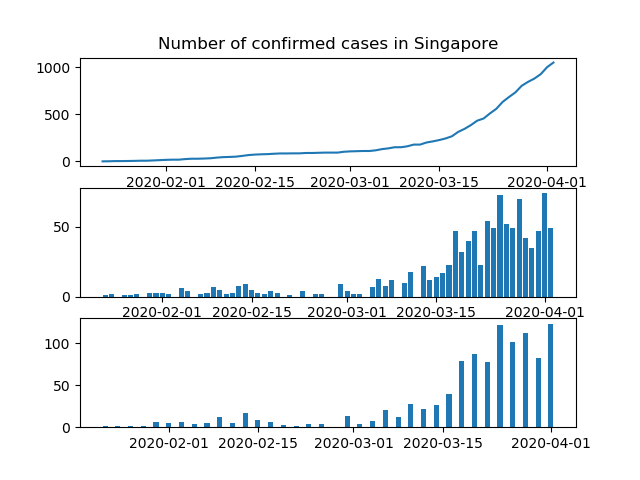

In [8]:
def plotCountry(country):
    totalSeries = confirmed_df.loc[country]
    newCaseDaily = confirmed_df.loc[country].rolling(window=2).aggregate(lambda x: x[1]-x[0])
    newCaseWeekly = newCaseDaily.resample('2D').sum()
    
    fig = plt.figure()
    gspec = gridspec.GridSpec(3,1)
    plt.subplot(gspec[0,0])
    plt.title('Number of confirmed cases in {country}'.format(country=country))
    plt.plot(totalSeries)
    plt.subplot(gspec[1,0])
    plt.bar(newCaseDaily.index, newCaseDaily.values)
    plt.subplot(gspec[2,0])
    plt.bar(newCaseWeekly.index, newCaseWeekly.values)

plotCountry('Singapore')

<IPython.core.display.Javascript object>


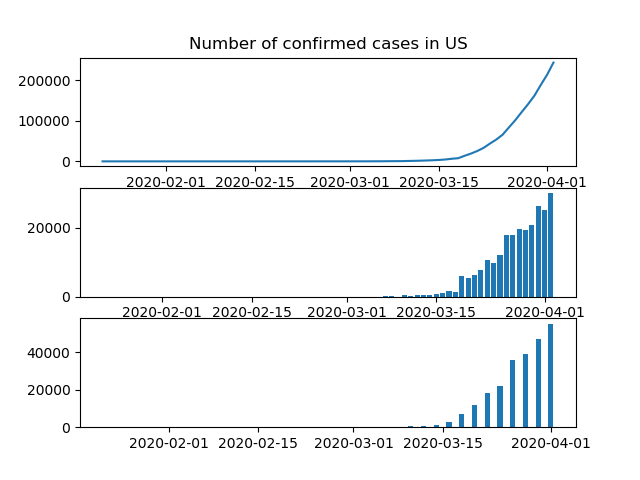

In [9]:
plotCountry('US')

<IPython.core.display.Javascript object>


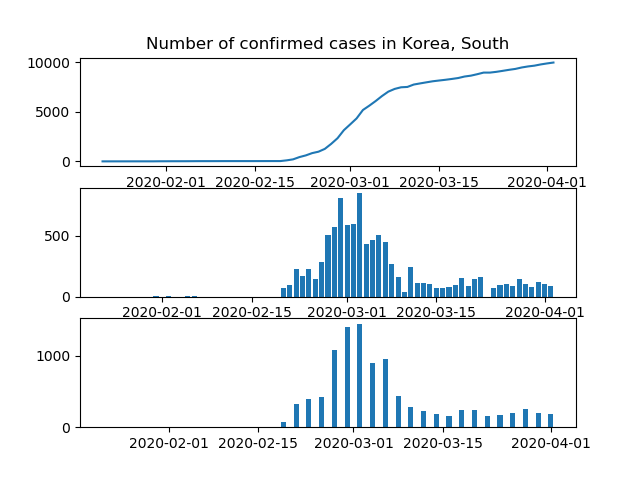

In [10]:
plotCountry('Korea, South')

In [31]:
test_list = confirmed_df.loc['Singapore'].rolling(window=2).aggregate(lambda x: x[1]-x[0]).resample('2D').sum().dropna()
test_list.index = test_list.index.astype('int')
mean = np.mean(test_list.index)
std = np.std(test_list.index)
test_list.index = (test_list.index-mean)/std
test_list = test_list/np.sum(test_list.values)
test_list

-1.684588    0.000953
-1.588326    0.001907
-1.492064    0.001907
-1.395802    0.001907
-1.299540    0.005720
-1.203277    0.004766
-1.107015    0.005720
-1.010753    0.003813
-0.914491    0.004766
-0.818229    0.011439
-0.721966    0.004766
-0.625704    0.016206
-0.529442    0.007626
-0.433180    0.005720
-0.336918    0.002860
-0.240655    0.000953
-0.144393    0.003813
-0.048131    0.003813
 0.048131    0.000000
 0.144393    0.012393
 0.240655    0.003813
 0.336918    0.006673
 0.433180    0.020019
 0.529442    0.011439
 0.625704    0.026692
 0.721966    0.020972
 0.818229    0.024786
 0.914491    0.038132
 1.010753    0.075310
 1.107015    0.082936
 1.203277    0.073403
 1.299540    0.116301
 1.395802    0.096282
 1.492064    0.106768
 1.588326    0.078170
 1.684588    0.117255
Name: Singapore, dtype: float64

In [32]:
def normal_pdf(x, mean, std):
    return np.exp(-0.5*np.power((x-mean)/std,2))/std/np.sqrt(2*np.pi)

In [33]:
def normal2_pdf(x, mean1, std1, mean2, std2):
    return normal_pdf(x,mean1,std1) + normal_pdf(x,mean2,std2)

In [34]:
from scipy.optimize import curve_fit
from scipy.stats import norm

<IPython.core.display.Javascript object>


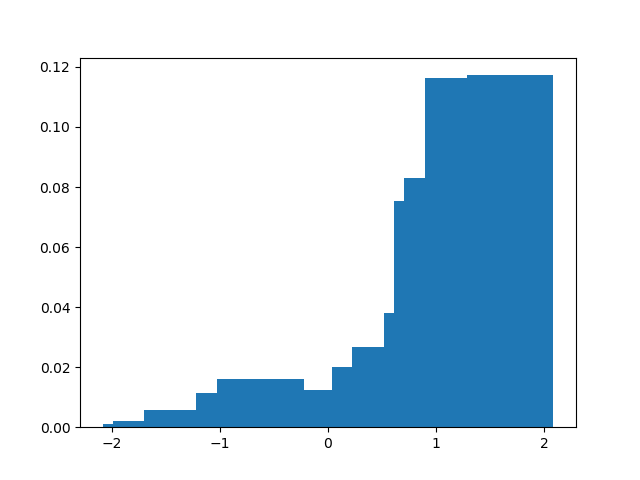

<BarContainer object of 36 artists>

In [49]:
plt.figure()
plt.bar(test_list.index, test_list.values)

In [56]:
guess = [-1, 0.5, 2, 1]
popt, pcov = curve_fit(normal2_pdf, test_list.index, test_list.values, guess, method='trf')
popt, pcov

(array([ 1.95177545,  0.6250622 ,  2.12633899, -0.65979387]),
 array([[ 0.59675453, -0.14655645,  0.55395883,  0.36509612],
        [-0.14655645,  0.04274765, -0.13274181, -0.09952025],
        [ 0.55395883, -0.13274181,  0.51590428,  0.33406209],
        [ 0.36509612, -0.09952025,  0.33406209,  0.23784105]]))

<IPython.core.display.Javascript object>


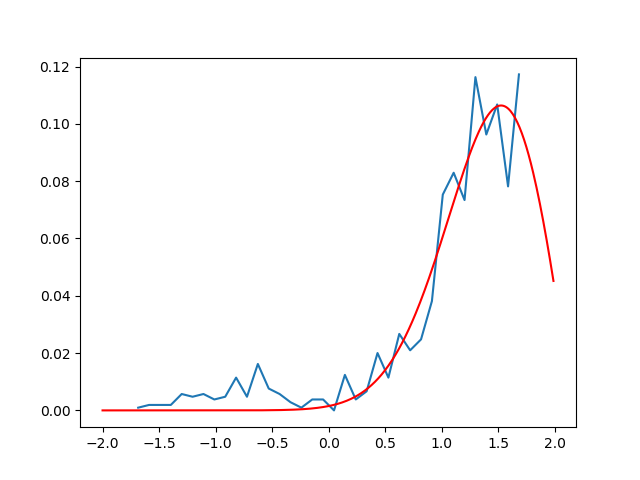

In [58]:
x = np.arange(-2,2,0.01)
y = normal2_pdf(x,popt[0],popt[1],popt[2],popt[3])
plt.figure()
plt.plot(test_list.index, test_list.values)
plt.plot(x,y,'red')

<IPython.core.display.Javascript object>


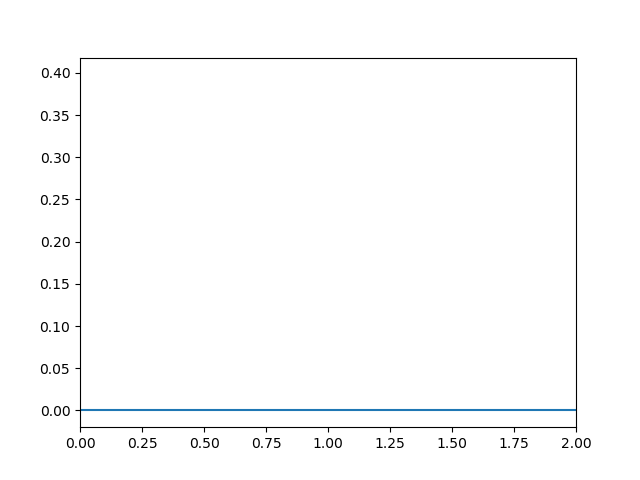

(0, 2)

In [65]:
params = norm.fit(test_list)
pdf_fitted = norm.pdf(x, *params[:-2], loc=params[-2], scale=params[-1]) * params[1]
plt.figure()
plt.plot(pdf_fitted)
plt.xlim(0,2)